# Non-Parametric Anomaly Detection

This notebook demonstrates how to detect univariate anomalies using non-parametric methods.

## Import necessary libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.neighbors import KernelDensity

## Define colors and load dataset

In [2]:
# Define the colors to be used in the plot.
colors = [
    "#2580B7", # Blue
    "#C03B26", # Red
    "#44546A", # Gray
]

# Load the tips dataset.
tips = sns.load_dataset("tips")
data = tips["tip"].values

## Histogram-Based Anomaly Detection

In [3]:
# Define the number of bins for the histogram.
NUM_BINS = 10

# Calculate the histogram.
hist, bin_edges = np.histogram(data, bins=NUM_BINS, density=True)

# Calculate the bin centers.
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

# Define a threshold for anomaly detection.
THRESHOLD = 0.05

# Calculate the threshold value based on the histogram.
threshold_value = np.percentile(data, 100 * (1 - THRESHOLD))

# Identify anomalies based on the threshold value.
anomalies = data[data > threshold_value]
non_anomalies = data[data <= threshold_value]

## Visualization: Histogram-Based Method

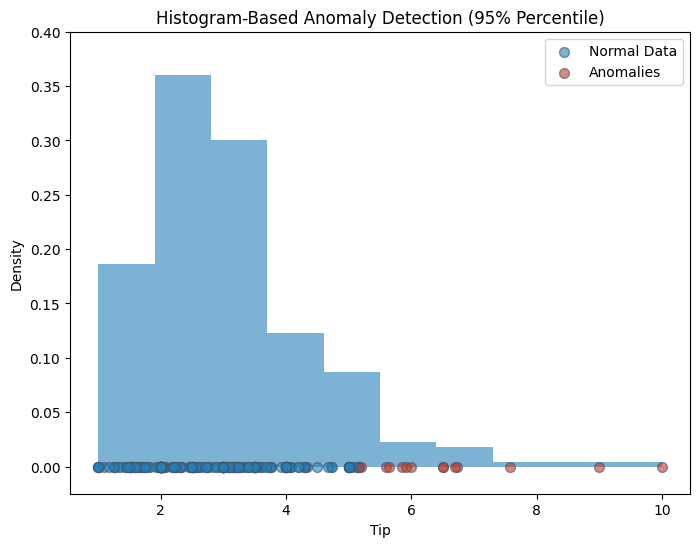

In [4]:
plt.figure(figsize=(8, 6))
plt.hist(data, bins=NUM_BINS, density=True, alpha=0.6, color=colors[0])
plt.scatter(
    non_anomalies, np.zeros_like(non_anomalies),
    color=colors[0], s=50, edgecolor=colors[-1], alpha=0.6, label="Normal Data"
)
plt.scatter(
    anomalies, np.zeros_like(anomalies),
    color=colors[1], s=50, edgecolor=colors[-1], alpha=0.6, label="Anomalies"
)
plt.xlabel("Tip")
plt.ylabel("Density")
plt.ylim(-0.025, 0.4)
plt.title("Histogram-Based Anomaly Detection (95% Percentile)")
plt.legend()
plt.show()

## Kernel Density Estimation (KDE)

In [5]:
# Perform Kernel Density Estimation (KDE).
kde = KernelDensity(kernel="gaussian", bandwidth=0.5).fit(data[:, None])

# Score samples to get the log density.
log_density = kde.score_samples(data[:, None])

# Define a threshold for anomaly detection based on log density.
kde_threshold = np.percentile(log_density, 100 * THRESHOLD)

# Identify anomalies based on the KDE threshold.
kde_anomalies = data[log_density < kde_threshold]
kde_non_anomalies = data[log_density >= kde_threshold]

## Visualization: KDE-Based Method

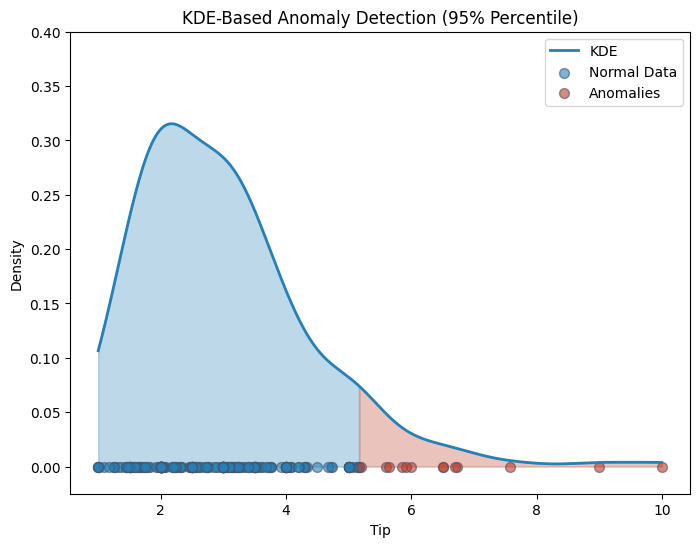

In [6]:
plt.figure(figsize=(8, 6))

# Plot the KDE.
x_d = np.linspace(min(data), max(data), 1000)
log_density_x = kde.score_samples(x_d[:, None])
plt.plot(
    x_d, np.exp(log_density_x),
    color=colors[0], lw=2, label="KDE"
)

# Fill the area of non-anomalies in blue.
plt.fill_between(
    x_d, np.exp(log_density_x),
    where=(x_d <= kde_non_anomalies.max()),
    color=colors[0], alpha=0.3
)

# Fill the area of anomalies in red.
plt.fill_between(
    x_d, np.exp(log_density_x),
    where=(x_d > kde_non_anomalies.max()),
    color=colors[1], alpha=0.3
)

# Plot the anomalies and non-anomalies.
plt.scatter(
    kde_non_anomalies, np.zeros_like(kde_non_anomalies),
    color=colors[0], s=50, edgecolor=colors[-1], alpha=0.6, label="Normal Data"
)
plt.scatter(
    kde_anomalies, np.zeros_like(kde_anomalies),
    color=colors[1], s=50, edgecolor=colors[-1], alpha=0.6, label="Anomalies"
)

plt.xlabel("Tip")
plt.ylabel("Density")
plt.ylim(-0.025, 0.4)
plt.title("KDE-Based Anomaly Detection (95% Percentile)")
plt.legend()
plt.show()